In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
doordash = pd.read_csv('/content/drive/MyDrive/Portfolio/doordash.csv')
doordash

,searched_zipcode,searched_lat,searched_lng,searched_address,searched_state,searched_city,searched_metro,city_slug,latitude,longitude,...,delivery_fee_raw,delivery_fee,delivery_time_raw,delivery_time,service_fee_raw,service_fee,phone,review_count,review_rating,RunDate
0,10003,40.732473,-73.987380,"41 Cooper Square, 7 E 7th St, New York, NY 100...",NY,New York,NY,NaN,40.675464,-73.980782,...,"$0.00 delivery fee, first order",0.0,24 - 34,29.0,NaN,NaN,NaN,1364,4.8,2022-04-25 07:01:12
1,11219,40.631075,-73.997695,"4701 15th Ave, Brooklyn, NY 11219, USA",NY,Brooklyn,NY,NaN,40.675464,-73.980782,...,"$0.00 delivery fee, first order",0.0,24 - 34,29.0,NaN,NaN,NaN,1364,4.8,2022-04-25 07:01:12
2,11216,40.678832,-73.950677,"300 Madison St, Brooklyn, NY 11216, USA",NY,Brooklyn,NY,NaN,40.675464,-73.980782,...,"$0.00 delivery fee, first order",0.0,24 - 34,29.0,NaN,NaN,NaN,1364,4.8,2022-04-25 07:01:12
3,11219,40.631075,-73.997695,"4701 15th Ave, Brooklyn, NY 11219, USA",NY,Brooklyn,NY,NaN,40.672978,-73.950462,...,"$0.00 delivery fee, first order",0.0,23 - 33,28.0,NaN,NaN,NaN,2000,4.6,2022-04-25 07:01:12
4,10003,40.732473,-73.987380,"41 Cooper Square, 7 E 7th St, New York, NY 100...",NY,New York,NY,NaN,40.672978,-73.950462,...,"$0.00 delivery fee, first order",0.0,23 - 33,28.0,NaN,NaN,NaN,2000,4.6,2022-04-25 07:01:12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11214,2176,42.457335,-71.061662,"119 Myrtle St, Melrose, MA 02176, USA",MA,Melrose,BO,NaN,42.463513,-71.026401,...,"$0.00 delivery fee, first order",0.0,35 - 45,40.0,NaN,NaN,NaN,955,4.0,2022-04-25 07:01:12
11215,2176,42.457335,-71.061662,"119 Myrtle St, Melrose, MA 02176, USA",MA,Melrose,BO,NaN,42.478599,-71.063536,...,"$0.00 delivery fee, first order",0.0,46 - 56,51.0,NaN,NaN,NaN,82,4.1,2022-04-25 07:01:12
11216,2176,42.457335,-71.061662,"119 Myrtle St, Melrose, MA 02176, USA",MA,Melrose,BO,NaN,42.460613,-71.027119,...,"$0.00 delivery fee, first order",0.0,27 - 37,32.0,NaN,NaN,NaN,110,4.5,2022-04-25 07:01:12
11217,2176,42.457335,-71.061662,"119 Myrtle St, Melrose, MA 02176, USA",MA,Melrose,BO,NaN,42.463535,-71.026164,...,"$0.00 delivery fee, first order",0.0,29 - 39,34.0,NaN,NaN,NaN,23,3.7,2022-04-25 07:01:12


In [4]:
doordash.columns

Index(['searched_zipcode', 'searched_lat', 'searched_lng', 'searched_address',
       'searched_state', 'searched_city', 'searched_metro', 'city_slug',
       'latitude', 'longitude', 'distance', 'loc_name', 'loc_number', 'url',
       'address', 'cuisines', 'delivery_fee_raw', 'delivery_fee',
       'delivery_time_raw', 'delivery_time', 'service_fee_raw', 'service_fee',
       'phone', 'review_count', 'review_rating', 'RunDate'],
      dtype='object')

In [5]:
doordash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11219 entries, 0 to 11218
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   searched_zipcode   11219 non-null  int64  
 1   searched_lat       11219 non-null  float64
 2   searched_lng       11219 non-null  float64
 3   searched_address   11219 non-null  object 
 4   searched_state     11219 non-null  object 
 5   searched_city      11219 non-null  object 
 6   searched_metro     11219 non-null  object 
 7   city_slug          0 non-null      float64
 8   latitude           11219 non-null  float64
 9   longitude          11219 non-null  float64
 10  distance           11219 non-null  float64
 11  loc_name           11219 non-null  object 
 12  loc_number         11219 non-null  int64  
 13  url                11219 non-null  object 
 14  address            11219 non-null  object 
 15  cuisines           11089 non-null  object 
 16  delivery_fee_raw   112

In [6]:
doordash.describe()

,searched_zipcode,searched_lat,searched_lng,city_slug,latitude,longitude,distance,loc_number,delivery_fee,delivery_time,service_fee_raw,service_fee,phone,review_count,review_rating
count,11219.000000,11219.000000,11219.000000,0.0,11219.000000,11219.000000,11219.000000,1.121900e+04,11202.0,11219.000000,0.0,0.0,0.0,11219.000000,11219.000000
mean,35001.169801,39.939128,-84.904828,NaN,39.699573,-85.915631,1.274879,2.543950e+06,0.0,54.557625,NaN,NaN,NaN,388.097870,3.920091
std,34486.767255,2.984812,17.284922,NaN,3.192532,18.156229,0.496751,5.559437e+06,0.0,334.530892,NaN,NaN,NaN,605.992376,1.542343
min,2118.000000,33.683250,-118.398784,NaN,25.794389,-122.408593,0.000000,1.183000e+03,0.0,10.000000,NaN,NaN,NaN,0.000000,0.000000
25%,10003.000000,40.631075,-87.786171,NaN,40.665452,-87.778819,0.931716,3.134035e+05,0.0,29.000000,NaN,NaN,NaN,8.000000,4.100000
50%,11219.000000,40.732473,-74.021199,NaN,40.694232,-74.016163,1.386758,1.044745e+06,0.0,35.000000,NaN,NaN,NaN,84.000000,4.500000
75%,60640.000000,41.947969,-73.950677,NaN,41.957512,-73.939569,1.686192,1.788611e+06,0.0,42.000000,NaN,NaN,NaN,463.500000,4.700000
max,92804.000000,42.457335,-70.996287,NaN,47.612657,-70.980546,1.999912,2.320363e+07,0.0,8640.000000,NaN,NaN,NaN,2000.000000,5.000000


In [7]:
doordash.isnull().sum()

searched_zipcode         0
searched_lat             0
searched_lng             0
searched_address         0
searched_state           0
searched_city            0
searched_metro           0
city_slug            11219
latitude                 0
longitude                0
distance                 0
loc_name                 0
loc_number               0
url                      0
address                  0
cuisines               130
delivery_fee_raw         0
delivery_fee            17
delivery_time_raw        0
delivery_time            0
service_fee_raw      11219
service_fee          11219
phone                11219
review_count             0
review_rating            0
RunDate                  0
dtype: int64

In [8]:
[features for features in doordash.columns if doordash[features].isnull().sum()>0]

['city_slug',
 'cuisines',
 'delivery_fee',
 'service_fee_raw',
 'service_fee',
 'phone']

<Axes: >

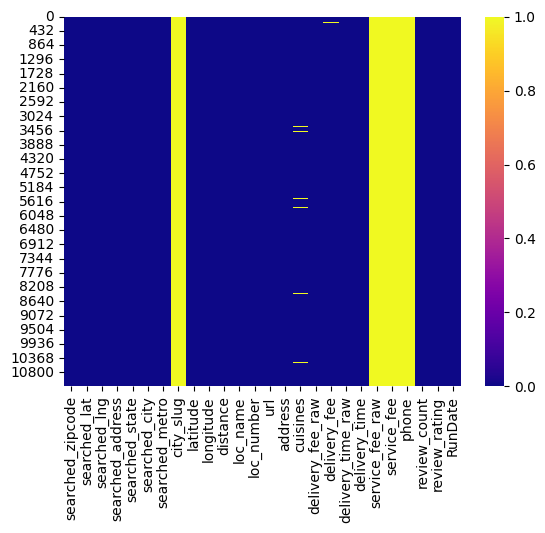

In [9]:
sns.heatmap(doordash.isnull(),cmap='plasma')

In [10]:
doordash.searched_state.value_counts().index

Index(['NY', 'IL', 'CA', 'MA', 'NJ'], dtype='object')

In [11]:
state_counts = doordash['searched_state'].value_counts()
state_counts

NY    4068
IL    2355
CA    2162
MA    1891
NJ     743
Name: searched_state, dtype: int64

In [12]:
top_states = state_counts.head(3)
top_states

NY    4068
IL    2355
CA    2162
Name: searched_state, dtype: int64

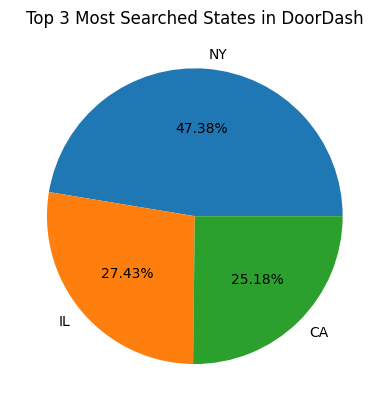

In [13]:
plt.pie(top_states, labels=top_states.index, autopct='%1.2f%%')
plt.title('Top 3 Most Searched States in DoorDash')
plt.show()

In [14]:
cuisine_count = doordash['cuisines'].value_counts()
cuisine_count

Alcohol|Beer, Wine & Spirits|Liquor Store                            70
American (New)|Fast Food|Ice Cream|Burgers|Fried Chicken|Chicken     35
Italian|Salads                                                       33
Burgers|Chicken Sandwiches|French Toast|Fast Food                    32
Convenience|Snacks|Grocery|Medicine|Personal Care|Baby|Home Goods    32
                                                                     ..
Chicken|Dinner|Comfort Food|American|Wings                            1
Dinner|American|Fast Food|Vegetarian|Burgers|Vegan                    1
American|Comfort Food|Wraps|Fast Food|Dinner                          1
Wings|Cheese Fries|Rice Bowl|Curry|Naan|Burgers|Fries                 1
American|Sandwiches|Burgers|Pizza                                     1
Name: cuisines, Length: 3249, dtype: int64

In [15]:
top_cuisines = cuisine_count.head(3)
top_cuisines

Alcohol|Beer, Wine & Spirits|Liquor Store                           70
American (New)|Fast Food|Ice Cream|Burgers|Fried Chicken|Chicken    35
Italian|Salads                                                      33
Name: cuisines, dtype: int64

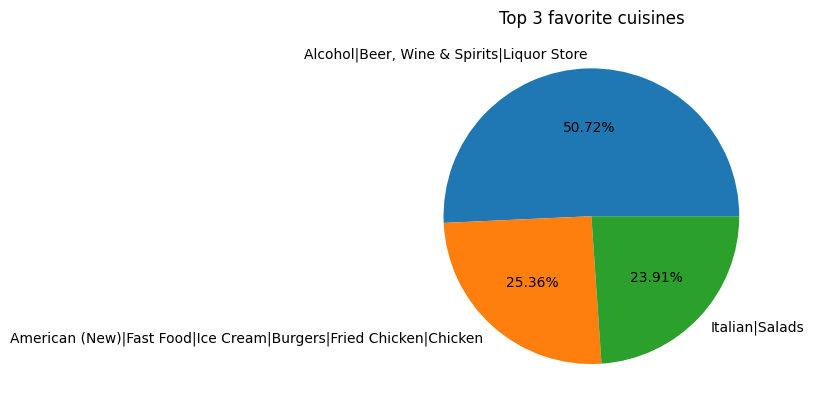

In [16]:
plt.pie(top_cuisines, labels=top_cuisines.index, autopct='%1.2f%%')
plt.title('Top 3 favorite cuisines')
plt.show()

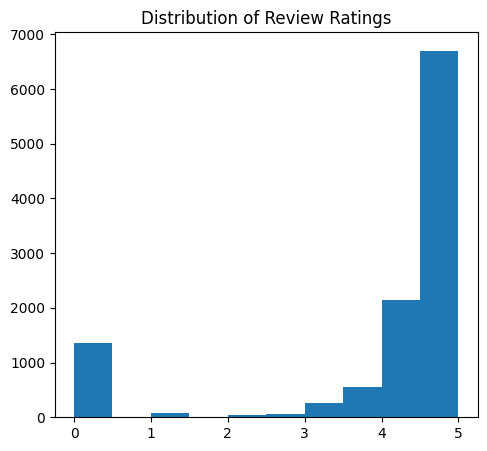

In [17]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(doordash['review_rating'])
plt.title('Distribution of Review Ratings')
plt.show()

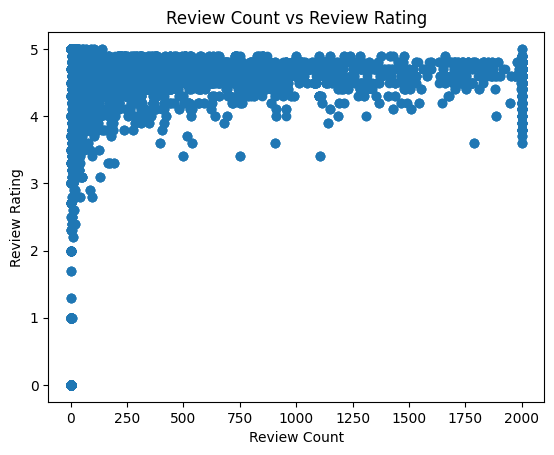

In [18]:
# Correlation Analysis
plt.scatter(doordash['review_count'], doordash['review_rating'])
plt.title('Review Count vs Review Rating')
plt.xlabel('Review Count')
plt.ylabel('Review Rating')
plt.show()

In [19]:
doordash['review_rating'] = pd.to_numeric(doordash['review_rating'], errors='coerce')
doordash['review_rating'].fillna(doordash['review_rating'].mean(), inplace=True)

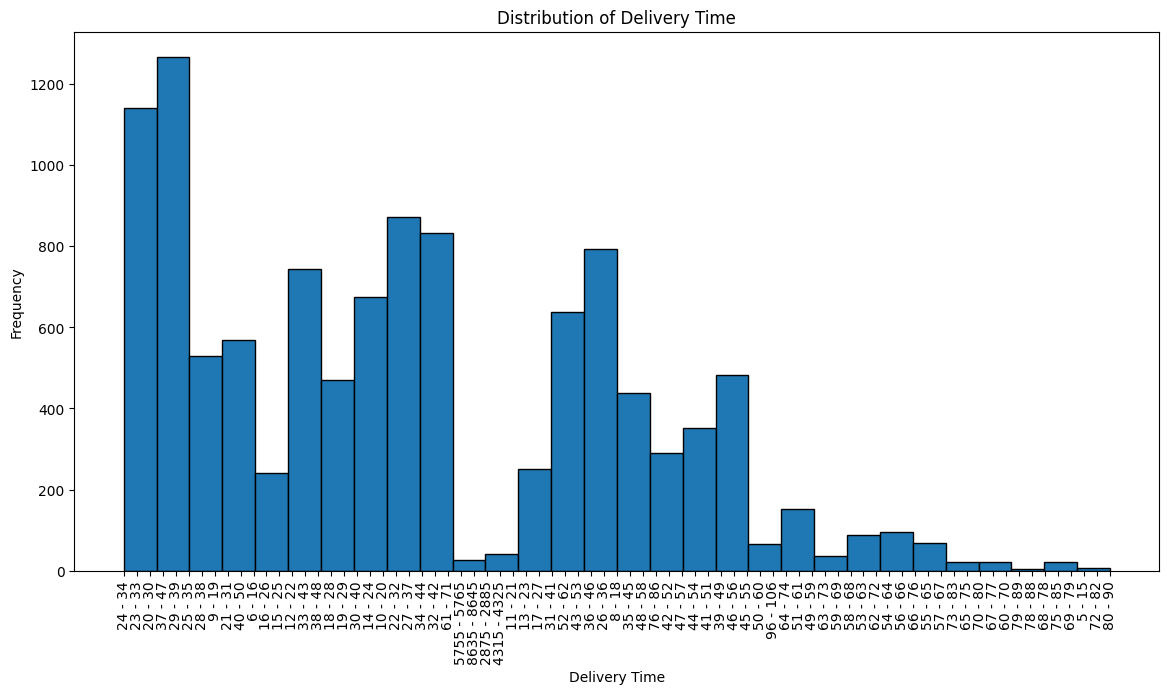

In [20]:
plt.figure(figsize=(14, 7))  # Increase figure size
plt.hist(doordash['delivery_time_raw'], bins=30, edgecolor='black')
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.show()



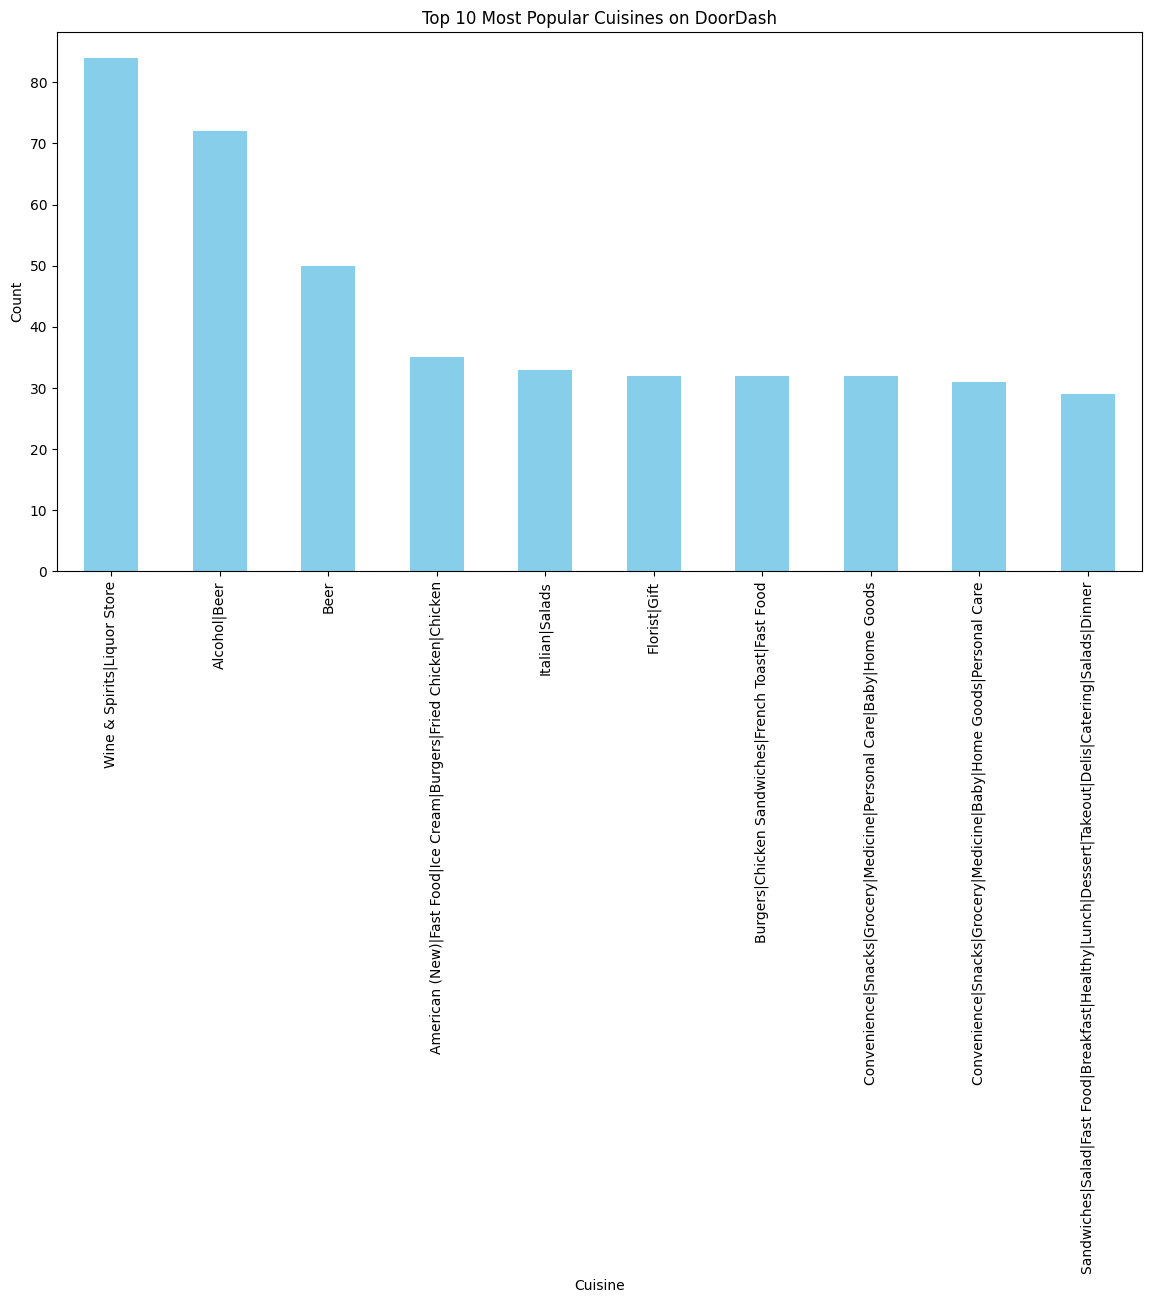

In [22]:
from collections import Counter

# Assuming each entry in the 'cuisines' column is a string of comma-separated cuisine names
# We first need to split these strings into lists, then explode the DataFrame to get one cuisine per row
cuisine_series = doordash['cuisines'].str.split(', ')  # Split the cuisines into lists
cuisine_series = cuisine_series.dropna()  # Drop any NaN values to avoid errors during explode
exploded_cuisines = cuisine_series.explode()  # Create a new row for each cuisine

# Now we count the occurrences of each cuisine
cuisine_counts = exploded_cuisines.value_counts()

# We can now plot the top 10 most common cuisines
top_cuisines = cuisine_counts.head(10)
plt.figure(figsize=(14, 7))
top_cuisines.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Cuisines on DoorDash')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Portfolio/Doordash analysis.ipynb"